<a href="https://colab.research.google.com/github/dream80/TonyColab/blob/master/Vid2Densepose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Vid2DensePose by Flode Labs**
Convert your videos easily to Densepose sequences

If you have any problem with the colab let us know via [X.com](https://x.com/flodelabs)

##**Install the libraries**

In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 15285, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15285 (delta 2), reused 6 (delta 0), pack-reused 15275
Receiving objects: 100% (15285/15285), 6.18 MiB | 15.66 MiB/s, done.
Resolving deltas: 100% (11113/11113), done.


In [ ]:
!pip install torch==2.1.0 torchvision==0.16.0 opencv-python git+https://github.com/facebookresearch/detectron2@main#subdirectory=projects/DensePose

  Cloning https://github.com/facebookresearch/detectron2 (to revision main) to /tmp/pip-req-build-0ulbl3jz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-0ulbl3jz
  Resolved https://github.com/facebookresearch/detectron2 to commit 5de5319a49e7ea819586d3d6a817632392dfdeb2
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-install-hlxvxaia/detectron2_98f6de916c98459eaa28eebd2bffd76c
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-hlxvxaia/detectron2_98f6de916c98459eaa28eebd2bffd76c
  Resolved https://github.com/facebookresearch/detectron2.git to commit 5de5319a49e7ea819586d3d6a817632392dfdeb2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 7.2 MB/s 

##**Convert your videos**

Upload the video you want to convert pressing the top left icon on the files section and then especify its name and the output name you desired on the next step.

 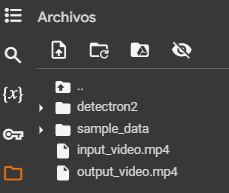

In [ ]:
from detectron2.config import get_cfg
import torch
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor
from densepose import add_densepose_config
from densepose.vis.extractor import DensePoseResultExtractor
from densepose.vis.densepose_results import DensePoseResultsFineSegmentationVisualizer as Visualizer

# Initialize Detectron2 configuration for DensePose
cfg = get_cfg()
add_densepose_config(cfg)
cfg.merge_from_file("detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml")
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl"
predictor = DefaultPredictor(cfg)

# Video paths
INPUT_VIDEO_PATH = "./input_video.mp4" #@param {type:"raw"}
OUTPUT_VIDEO_PATH = "./output_video.mp4" #@param {type:"raw"}

# Open the input video
cap = cv2.VideoCapture(INPUT_VIDEO_PATH)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(OUTPUT_VIDEO_PATH, fourcc, fps, (width, height))

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    with torch.no_grad():
        outputs = predictor(frame)['instances']

    results = DensePoseResultExtractor()(outputs)
    cmap = cv2.COLORMAP_VIRIDIS
    # Visualizer outputs black for background, but we want the 0 value of
    # the colormap, so we initialize the array with that value
    arr = cv2.applyColorMap(np.zeros((height, width), dtype=np.uint8), cmap)
    out_frame = Visualizer(alpha=1, cmap=cmap).visualize(arr, results)
    out.write(out_frame)

# Release resources
cap.release()
out.release()


model_final_162be9.pkl: 256MB [00:01, 225MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
